# Project 4: West Nile Virus Prediction


# Problem Statement

**Using weather data and GIS data, we need to predict whether West Nile virus is present or not, for a given time, location, and species.**




## Contents:
- [Background](#Background)
- [Train dataset](#Train-dataset)
- [Test dataset](#Test-set)
- [Spray dataset](#Spray-dataset)
- [Weather dataset](#Weather-dataset)
- [Combined dataset](#Combined-dataset)

## Background
Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for the presence of West Nile virus before the end of the week. The test results include the number of mosquitos, the mosquitos species, and whether or not West Nile virus is present in the cohort. 



In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

# import statsmodels.api as sm
# from statsmodels.formula.api import ols


# Data

**Data from [Kaggle](https://www.kaggle.com/c/predict-west-nile-virus/data):** 
* spray.csv: this is the GIS data for the City of Chicago's spray efforts in 2011 and 2013
* weather.csv: this contains weather conditions of 2007 to 2014, during the months of the tests, from NOAA
* train.csv: this is the training dataset
* test.csv: this is the test dataset

## Data Import 


In [2]:
spray = pd.read_csv('../raw-data/spray.csv')
weather = pd.read_csv('../raw-data/weather.csv')
train = pd.read_csv('../raw-data/train.csv')
test = pd.read_csv('../raw-data/test.csv')

In [3]:
# spray = pd.read_csv('../data/spray.csv')
# weather = pd.read_csv('../data/weather.csv')
# train = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')

## Maps

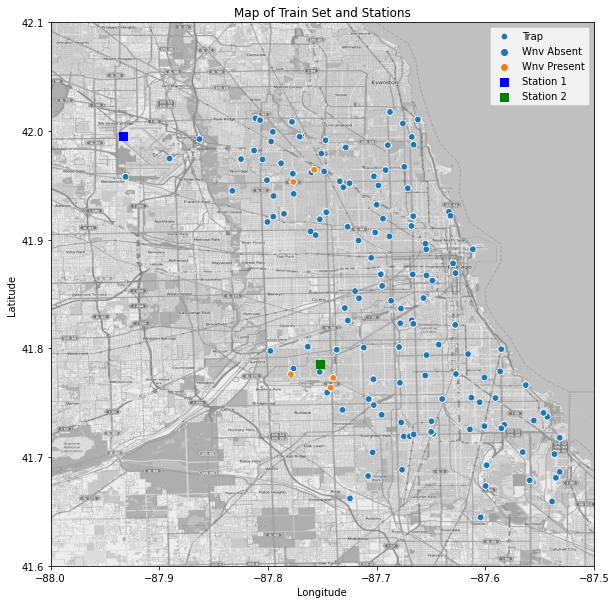

In [4]:
# https://www.kaggle.com/c/predict-west-nile-virus/
# This shows how to read the text representing a map of Chicago in numpy, and put it on a plot in matplotlib.
# This example also rescales the image data to the GPS co-ordinates of the bounding box and overlays some random points.

import numpy as np
import matplotlib.pyplot as plt

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

# mapdata = np.loadtxt('data/mapdata_copyright_openstreetmap_contributors.txt')
# mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')
mapdata = np.loadtxt('../../../../predict-west-nile-virus/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt')


# generate some data to overlay
numPoints = 300
lats = train['Latitude']
longs = train['Longitude']
wnv = train['WnvPresent']

station_1 = [41.995, -87.933]  # Co-ords of station 1 (Chicago O'Hare Int'l Airport)
station_2 = [41.786, -87.752]  # Co-ords of station 2 (Chicago Midway Int'l Airport)

plt.figure(figsize=(10,10))

# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x=longs, y=lats, 
                c='k', 
                hue=wnv, 
                s=40)

plt.scatter(x=station_1[1], y=station_1[0], c='b', s=60, marker='s')
plt.scatter(x=station_2[1], y=station_2[0], c='g', s=60, marker='s')

# plt.show()
plt.title('Map of Train Set and Stations')
plt.legend(['Trap', 'Wnv Absent', 'Wnv Present', 'Station 1', 'Station 2']);
plt.savefig('map.png')

## Train dataset

In [5]:
#preview training data
train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [6]:
train.shape

(10506, 12)

### Preliminary Changes

#### Renamed Column Names to Lowercase


In [7]:
# Renamed column names to lowercase
train.columns = train.columns.str.lower()

In [8]:
train.dtypes

date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

#### Change Data Type

We changed the format of ```Column: 'date'``` from ```object``` to ```datetime64[ns]``` to enable the dates to be read appropriately.

In [9]:
# change date to numerical
train['date'] = pd.to_datetime(train['date'])

### Ranking Species

We find that some species has a higher probability of carrying the West Nile Virus than others. In particular, a ```Culex Pipiens``` has a higher probability of carrying the virus as compared to ```Culex Restuans```. Accordingly, we rank their probability of carrying the virus in ordinal values, where a higher value denotes that the species has a higher probability of carrying the virus.

|Species|Probability|Ordinal Value|
|-------|-----------|----|
|Cullex Pipiens|8.89%|3|
|Cullex Pipiens/Restuans|5.51%|2|
|Cullex Restuans|1.79%|1|
|All Others|0.00%|np.nan|

In [10]:
# Number of traps which catches any mosquito.
mozzies_1 = train.loc[train['nummosquitos'] > 0,['species', 'nummosquitos']].groupby('species').count()
mozzies_1.rename(columns={'nummosquitos': 'catches'}, inplace=True)

# Number of traps which catches a wnv mozzie.
mozzies_2 = train[['species', 'nummosquitos', 'wnvpresent']].groupby(by='species').sum()

# Merging the two above.
mozzies_freq = pd.merge(left=mozzies_1,
                        right=mozzies_2,
                        on='species',
                        how='outer'
                       ).fillna(0)

# How often a wnv mozzie is caught in any catch.
mozzies_freq['catch_freq'] = mozzies_freq['wnvpresent'] / mozzies_freq['catches']
mozzies_freq['present_freq'] = mozzies_freq['wnvpresent'] / mozzies_freq['nummosquitos']


# Basically this that it's more likely to find Wnv in pipiens, then pipiens/restuans, then restuans
# I think the species ranking should be:
# 3: Pipiens
# 2: Pipiens/Restuans
# 1: Restuans
# Based on the likelihood a wnv is found in a species-based catch.
mozzies_freq.reset_index(inplace=True)
mozzies_freq

,species,catches,nummosquitos,wnvpresent,catch_freq,present_freq
0,CULEX ERRATICUS,1,7,0,0.000000,0.000000
1,CULEX PIPIENS,2699,44671,240,0.088922,0.005373
2,CULEX PIPIENS/RESTUANS,4752,66268,262,0.055135,0.003954
3,CULEX RESTUANS,2740,23431,49,0.017883,0.002091
4,CULEX SALINARIUS,86,145,0,0.000000,0.000000
5,CULEX TARSALIS,6,7,0,0.000000,0.000000
6,CULEX TERRITANS,222,510,0,0.000000,0.000000


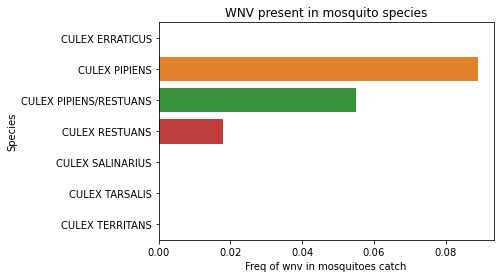

In [11]:
# plot
sns.barplot(data=mozzies_freq, x='catch_freq', y='species');
plt.title('WNV present in mosquito species')
plt.xlabel('Freq of wnv in mosquitoes catch')
plt.ylabel('Species');


From the above plot, the dominant species carrying the west nile virus are the culex pipiens, culex restuans and culex pipiens/restuans. This parameter will be converted to ordinal. The other species will be dropped.

In [12]:
# rank species
# larger value, more likely to have wnvpresent
mspecies = {'CULEX PIPIENS': 3, 'CULEX PIPIENS/RESTUANS': 2, 'CULEX RESTUANS': 1}
train['species_nr'] = train['species'].map(mspecies)

In [13]:
# nan is given for rows of other species
train['species_nr'].unique()

array([ 2.,  1.,  3., nan])

In [14]:
# replace other species with '0'
train['species_nr'] = train['species_nr'].fillna(0)

In [15]:
# drop species column
train.drop(columns=['species'],inplace=True)

### Combine Number of Mosquitos

While nummosquitos are not in the test set, we believe that we can create a feature based on the training data which will provide additional predictive power to our model. We note that the maximum number of mosquitos in a row is 50. However, multiple traps may exist for the same location. As such, we combine the number of mosquitos caught based on the traps.

In [16]:
# check duplicates
train.loc[train.duplicated(subset=['date','trap'])]

,date,address,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,species_nr
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1.0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,1.0
12,2007-05-29,"2200 North Cannon Drive, Chicago, IL 60614, USA",22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8,3,0,1.0
14,2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10488,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,11,0,3.0
10489,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,1,0,3.0
10492,2013-09-26,"5100 North Mont Clare Avenue, Chicago, IL 6065...",51,N MONT CLARE AVE,T223,"5100 N MONT CLARE AVE, Chicago, IL",41.973845,-87.805059,9,1,0,3.0
10495,2013-09-26,"East 91st Place, Chicago, IL, USA",65,E 91ST PL,T227,"6500 E 91ST PL, Chicago, IL",41.728495,-87.600963,5,1,0,3.0


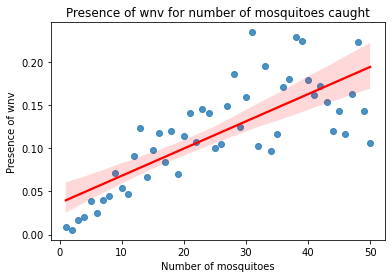

In [17]:
# plot nummosquitos and wnvpresent
sns.regplot(x=train.groupby(['nummosquitos'])['wnvpresent'].mean().index,y=train.groupby(['nummosquitos'])['wnvpresent'].mean(),line_kws={"color": "red"})
plt.title('Presence of wnv for number of mosquitoes caught');
plt.xlabel('Number of mosquitoes');
plt.ylabel('Presence of wnv');

The above plot shows that the more mosquitoes are caught, chances of wnv detected are higher. Unfortunately, nummosquitos is absent in test set.

In [18]:
# combine nummosquitoes based on date and trap
train = train.groupby(by=['date','species_nr','latitude','longitude','addressaccuracy','trap'],as_index=False)['nummosquitos','wnvpresent'].sum()
train 

/Users/edwardnathanael/opt/anaconda3/envs/tensordsi24/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,date,species_nr,latitude,longitude,addressaccuracy,trap,nummosquitos,wnvpresent
0,2007-05-29,1.0,41.688324,-87.676709,8,T086,1,0
1,2007-05-29,1.0,41.720848,-87.666014,9,T094,3,0
2,2007-05-29,1.0,41.731922,-87.677512,8,T096,5,0
3,2007-05-29,1.0,41.732984,-87.649642,8,T159,1,0
4,2007-05-29,1.0,41.862292,-87.648860,8,T091,1,0
...,...,...,...,...,...,...,...,...
8456,2013-09-26,3.0,41.960616,-87.777189,9,T017,2,0
8457,2013-09-26,3.0,41.964242,-87.757639,8,T003,3,1
8458,2013-09-26,3.0,41.973845,-87.805059,9,T223,1,0
8459,2013-09-26,3.0,41.974689,-87.890615,9,T900,37,0


In [19]:
# combined number of mosquitoes
train['nummosquitos'].unique()

array([   1,    3,    5,    2,    4,    8,    7,   10,    9,   25,   19,
          6,   20,   12,   11,   16,   28,   27,   21,   18,   14,  189,
        143,   17,   15,   22,   13,   39,   51,   29,   76,   50,   42,
        102,   63,  100,   30,   34,   26,   53,  418,   32,  644,   83,
        411, 2356,   55,  502,   23,  164,   43,  203,   89,  765,  223,
        378,   69,  219,   46,   31,   24,   65,   61,  104,   82,   67,
       1543,   88,   36,  477,   52,   41,   72,   54,  113,  200,  153,
         35,  266,  362,   33,   57,  184,   70,  712,  154,   62,   56,
         45,   44,   37,  315,  137,   80,  234, 1310,  110,  305, 1658,
        115,  146,  253,   74,  130,   86,   71,  108,   49,   38,   98,
         79,  138,  157,   90,  118, 2532,  821, 1000,  177,  121,  279,
        174,   60,  651,   68,  230,  231, 1554,  209,  217, 1054,   85,
         40,  106,  269,  399,  123, 2207,   48,  211,  421,  290,  561,
         75,  127, 1648,  914,   47,  387,  116,  3

The data/traps is organized in batches of 50. 

In [20]:
train[(train['nummosquitos']== 50)]

,date,species_nr,latitude,longitude,addressaccuracy,trap,nummosquitos,wnvpresent
452,2007-07-18,2.0,41.673408,-87.599862,5,T115,50,0
555,2007-07-19,3.0,41.726465,-87.585413,5,T138,50,0
1001,2007-08-03,2.0,41.686398,-87.531635,8,T215,50,0
1315,2007-08-15,2.0,41.923738,-87.785288,9,T013,50,0
1349,2007-08-15,3.0,41.673408,-87.599862,5,T115,50,0
1462,2007-08-17,3.0,41.678618,-87.559308,5,T200,50,0
1465,2007-08-17,3.0,41.702724,-87.536497,5,T103,50,0
2043,2007-09-05,3.0,41.726465,-87.585413,5,T138,50,0
2073,2007-09-06,2.0,41.726465,-87.585413,5,T138,50,0
3037,2009-06-12,2.0,41.801498,-87.763416,9,T031,50,0


In [21]:
train['trap'].unique()

array(['T086', 'T094', 'T096', 'T159', 'T091', 'T048', 'T046', 'T129',
       'T049', 'T153', 'T045', 'T054', 'T002', 'T015', 'T007', 'T050',
       'T143', 'T148', 'T135', 'T158', 'T089', 'T152', 'T090', 'T145',
       'T033', 'T151', 'T154', 'T147', 'T011', 'T218', 'T019', 'T142',
       'T146', 'T141', 'T220', 'T025', 'T009', 'T028', 'T150', 'T016',
       'T162', 'T031', 'T092', 'T149', 'T161', 'T085', 'T034', 'T040',
       'T043', 'T047', 'T037', 'T003', 'T219', 'T006', 'T008', 'T051',
       'T001', 'T012', 'T088', 'T084', 'T030', 'T014', 'T018', 'T160',
       'T013', 'T144', 'T044', 'T095', 'T005', 'T017', 'T065', 'T075',
       'T083', 'T080', 'T079', 'T069', 'T073', 'T077', 'T076', 'T114',
       'T082', 'T081', 'T074', 'T067', 'T066', 'T155', 'T071', 'T070',
       'T061', 'T060', 'T035', 'T036', 'T039', 'T004', 'T062', 'T200',
       'T138', 'T212', 'T215', 'T206', 'T209', 'T115', 'T063', 'T128',
       'T107', 'T072', 'T103', 'T156', 'T100', 'T099', 'T102', 'T027',
      

In [22]:
# combine traps
def trap_digits(row):
    '''combine satellite traps, and convert traps to numerical '''
    row['trap'] = int(
        re.sub(
            pattern='\D+', 
            repl='', 
            string=row['trap']))
    return row

In [23]:
# combine traps
train = train.apply(trap_digits, axis=1)

In [24]:
train['trap'].unique()

array([ 86,  94,  96, 159,  91,  48,  46, 129,  49, 153,  45,  54,   2,
        15,   7,  50, 143, 148, 135, 158,  89, 152,  90, 145,  33, 151,
       154, 147,  11, 218,  19, 142, 146, 141, 220,  25,   9,  28, 150,
        16, 162,  31,  92, 149, 161,  85,  34,  40,  43,  47,  37,   3,
       219,   6,   8,  51,   1,  12,  88,  84,  30,  14,  18, 160,  13,
       144,  44,  95,   5,  17,  65,  75,  83,  80,  79,  69,  73,  77,
        76, 114,  82,  81,  74,  67,  66, 155,  71,  70,  61,  60,  35,
        36,  39,   4,  62, 200, 138, 212, 215, 206, 209, 115,  63, 128,
       107,  72, 103, 156, 100,  99, 102,  27,  97,  78, 157, 221, 900,
       903, 225, 222, 227, 223, 226, 224, 229, 230, 228, 232, 235, 231,
       233, 236, 237, 238])

In [25]:
train

,date,species_nr,latitude,longitude,addressaccuracy,trap,nummosquitos,wnvpresent
0,2007-05-29,1.0,41.688324,-87.676709,8,86,1,0
1,2007-05-29,1.0,41.720848,-87.666014,9,94,3,0
2,2007-05-29,1.0,41.731922,-87.677512,8,96,5,0
3,2007-05-29,1.0,41.732984,-87.649642,8,159,1,0
4,2007-05-29,1.0,41.862292,-87.648860,8,91,1,0
...,...,...,...,...,...,...,...,...
8456,2013-09-26,3.0,41.960616,-87.777189,9,17,2,0
8457,2013-09-26,3.0,41.964242,-87.757639,8,3,3,1
8458,2013-09-26,3.0,41.973845,-87.805059,9,223,1,0
8459,2013-09-26,3.0,41.974689,-87.890615,9,900,37,0


Since trap numbers are not unique in train and test sets, it is not wise to rank them according to 'nummosquitos' and 'wnvpresent'. However, from the plot below, some traps kept catching mosquitoes with presence of wnv.

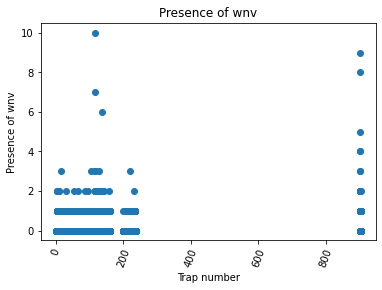

In [26]:
# plot effects of traps
plt.scatter(train['trap'],train['wnvpresent']);
plt.xticks(rotation=70);
plt.title('Presence of wnv');
plt.xlabel('Trap number');
plt.ylabel('Presence of wnv');

In [27]:
train['wnvpresent'].describe()

count    8461.000000
mean        0.065122
std         0.337757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: wnvpresent, dtype: float64

From the above info, wnvpresent is significantly positive skewed, and majority is '0'. 
<br> Therefore, the decision was to convert trap to ordinal, based on wnvpresent in each trap.

In [28]:
train['wnvpresent'].value_counts()

0     8004
1      409
2       31
3        9
4        2
10       1
7        1
6        1
9        1
8        1
5        1
Name: wnvpresent, dtype: int64

In [29]:
# rank trap
# larger value, more likely to have wnvpresent
def rank_trap(row):
    if row['wnvpresent'] > 4:
        row['trap_rank'] = 4
    elif row['wnvpresent'] == 3:
        row['trap_rank'] = 3
    elif row['wnvpresent'] == 2:
        row['trap_rank'] = 2
    elif row['wnvpresent'] == 1:
        row['trap_rank'] = 1
    else: 
        row['trap_rank'] = 0
    return row  

In [30]:
train = train.apply(rank_trap, axis=1)

In [31]:
train

,date,species_nr,latitude,longitude,addressaccuracy,trap,nummosquitos,wnvpresent,trap_rank
0,2007-05-29,1.0,41.688324,-87.676709,8,86,1,0,0
1,2007-05-29,1.0,41.720848,-87.666014,9,94,3,0,0
2,2007-05-29,1.0,41.731922,-87.677512,8,96,5,0,0
3,2007-05-29,1.0,41.732984,-87.649642,8,159,1,0,0
4,2007-05-29,1.0,41.862292,-87.648860,8,91,1,0,0
...,...,...,...,...,...,...,...,...,...
8456,2013-09-26,3.0,41.960616,-87.777189,9,17,2,0,0
8457,2013-09-26,3.0,41.964242,-87.757639,8,3,3,1,1
8458,2013-09-26,3.0,41.973845,-87.805059,9,223,1,0,0
8459,2013-09-26,3.0,41.974689,-87.890615,9,900,37,0,0


### Baseline Score

Our baseline score is based on the absence of observation of the West Nile Virus. Our basic model provides us:

|score|Probability|Description|
|-----|-----------|-----------|
|Baseline score|<center>94.76%</center>|No West Nile Virus|

In [32]:
train['wnvpresent'].value_counts(normalize=True)

0     0.945987
1     0.048339
2     0.003664
3     0.001064
4     0.000236
10    0.000118
7     0.000118
6     0.000118
9     0.000118
8     0.000118
5     0.000118
Name: wnvpresent, dtype: float64

## Test set 

In [33]:
#preview testdata
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [34]:
# need to predict nummosquitoes and wnvpresent
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [35]:
test.shape

(116293, 11)

### Renamed Column Names to Lowercase



In [36]:
# change column names to lower
test.columns = test.columns.str.lower()

### Change Data Type

We changed the format of ```Column: 'date'``` from ```object``` to ```datetime64[ns]``` to enable the dates to be read appropriately.

In [37]:
# change date to numerical
test['date'] = pd.to_datetime(test['date'])


### Drop Columns

We dropped several columns which provides human-readable identifiers for locations due to redundancy. Since we have latitudes and longitude, human-readable identifiers are not necessary.

Columns Dropped:

    - Address
    - Block
    - Street
    - AddressNumberAndStreet

In [38]:
# Drop columns
test.drop(columns=['address','block','street','addressnumberandstreet'],inplace=True)

### Feature Engineering: Species (Ordinal)

From our exploratory visualizations, we find that while many species of mosquitoes are found, only 2 of those species carry the West Nile Virus: ```Culex Pipiens``` and ```Culex Restuans```. As such, we drop the species which do carry West Nile Virus.

Additionally, we find that there are differences in the frequency of West Nile Virus observed in a species. As such, we engineer a feature to denote the species by the frequency that West Nile Virus is observed.

In [39]:
test['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [40]:
test.head()

,id,date,species,trap,latitude,longitude,addressaccuracy
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,9
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,9
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,9
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,9
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,9


In [41]:
test['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

From the above plot, the dominant species carrying the west nile virus are the culex pipiens, culex restuans and culex pipiens/restuans. This parameter will be converted to ordinal. The other species will be dropped.


In [42]:
# Larger value, more likely to have wnvpresent
test['species_nr'] = test['species'].map(mspecies)

In [43]:
# replace other species with '0'
test['species_nr'] = test['species_nr'].fillna(0)

In [44]:
test.drop(columns='species',inplace=True)

In [45]:
test

,id,date,trap,latitude,longitude,addressaccuracy,species_nr
0,1,2008-06-11,T002,41.954690,-87.800991,9,2.0
1,2,2008-06-11,T002,41.954690,-87.800991,9,1.0
2,3,2008-06-11,T002,41.954690,-87.800991,9,3.0
3,4,2008-06-11,T002,41.954690,-87.800991,9,0.0
4,5,2008-06-11,T002,41.954690,-87.800991,9,0.0
...,...,...,...,...,...,...,...
116288,116289,2014-10-02,T054C,41.925652,-87.633590,8,0.0
116289,116290,2014-10-02,T054C,41.925652,-87.633590,8,0.0
116290,116291,2014-10-02,T054C,41.925652,-87.633590,8,0.0
116291,116292,2014-10-02,T054C,41.925652,-87.633590,8,0.0


### Modify Column: Trap

Similar to our train set, we apply a function to combine our trap identifiers.

In [46]:
test['trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [47]:
# digitise traps
test = test.apply(trap_digits, axis=1)

In [48]:
train['trap'].equals(test['trap'])

False

trap data in train and test set have different unique values in each dataset.

In [49]:
test['trap_rank'] = test['trap'].replace(train.set_index('trap')['trap_rank'])

In [50]:
test['trap_rank'].unique()

array([  0,   1, 234])

Turned out the one trap not in training set is trap 234.

In [51]:
# no trap 234 in train set
train[train['trap']== 234]

,date,species_nr,latitude,longitude,addressaccuracy,trap,nummosquitos,wnvpresent,trap_rank


In [52]:
# trap 234 in test set
test[test['trap_rank']== 234]

,id,date,trap,latitude,longitude,addressaccuracy,species_nr,trap_rank
1144,1145,2008-06-11,234,41.942285,-87.761726,8,2.0,234
1145,1146,2008-06-11,234,41.942285,-87.761726,8,1.0,234
1146,1147,2008-06-11,234,41.942285,-87.761726,8,3.0,234
1147,1148,2008-06-11,234,41.942285,-87.761726,8,0.0,234
1148,1149,2008-06-11,234,41.942285,-87.761726,8,0.0,234
...,...,...,...,...,...,...,...,...
116232,116233,2014-10-02,234,41.942285,-87.761726,8,0.0,234
116233,116234,2014-10-02,234,41.942285,-87.761726,8,0.0,234
116234,116235,2014-10-02,234,41.942285,-87.761726,8,0.0,234
116235,116236,2014-10-02,234,41.942285,-87.761726,8,0.0,234


In [53]:
len(test[test['trap_rank']== 234])/len(test)

0.006535217080993697

Trap 234 is 0.6% of test set, and needs to be ranked. Using latitude and longitude data, trap 234 was placed where the blue square is (map below), which is mostly surrounded by wnvpresent=0. Therefore, we will also **rank trap 234 as '0'.**

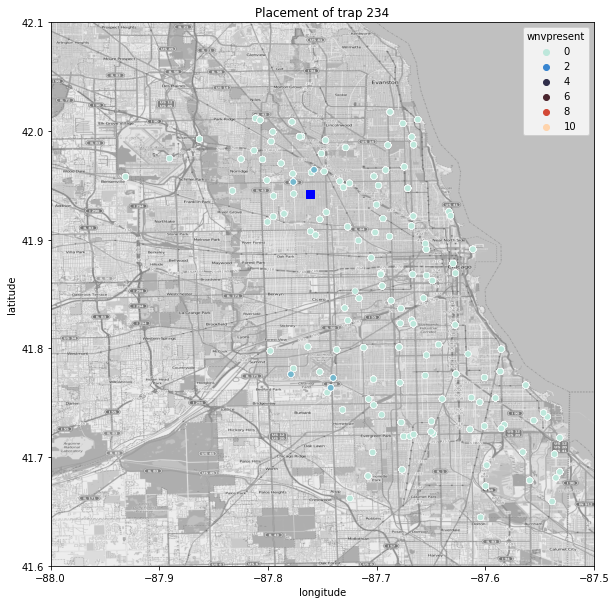

In [54]:
# https://www.kaggle.com/c/predict-west-nile-virus/
# This shows how to read the text representing a map of Chicago in numpy, and put it on a plot in matplotlib.
# This example also rescales the image data to the GPS co-ordinates of the bounding box and overlays some random points.

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

# mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')
mapdata = np.loadtxt('../../../../predict-west-nile-virus/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt')


# generate some data to overlay
numPoints = 300
lats = train['latitude']
longs = train['longitude']
wnv = train['wnvpresent']

intersection = [test[test['trap_rank']== 234]['latitude'].values[0], test[test['trap_rank']== 234]['longitude'].values[0]]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

plt.figure(figsize=(10,10))

# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x=longs, y=lats, c='r', palette='icefire', hue=wnv, s=40)
plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')
plt.title('Placement of trap 234')

plt.savefig('map_trap234.png')

In [55]:
# rank trap234 as 0
test['trap_rank'] = test['trap_rank'].replace(234,0)

In [56]:
# drop trap
test.drop(columns=['trap'],inplace=True)
train.drop(columns=['trap'],inplace=True)

In [57]:
# ensure no rows were dropped
test.shape

(116293, 7)

## Spray dataset

### Renamed Column Names to Lowercase

In [58]:
# Rename column names to lowercase
spray.columns = spray.columns.str.lower()

### Change Data Type

We changed the format of ```Column: 'date'``` from ```object``` to ```datetime64[ns]``` to enable the dates to be read appropriately.

In [59]:
# Change date to datetime64[ns] format
spray['date'] = pd.to_datetime(spray['date'])

### Drop Column: Time

We observe 584 missing values in ```time```. While knowing both time and dates of the spray may allow us to create a better model, we believe that ```time``` of spray does not materially affect our model as much as the noise it may bring. The noise that ```tiem``` will bring is compounded with our errors if we were to impute the missing time. As such, we believe that it would be better for us to drop the ```time``` column instead of including it into our model.

In [60]:
# View count of null values
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [61]:
# Drop time column
spray.drop(columns='time',inplace=True)

### Feature Engineering: Week, Month, Year

We engineered several features based on spray dates. We believe that adding this feature may enable us to have a better view on seasonalities.

In [62]:
spray['week'] = spray['date'].dt.isocalendar().week
spray['month'] = spray['date'].dt.month
spray['year'] = spray['date'].dt.year

### Drop Duplicates

We find that several observations are duplicated. This may be due to several reasons including but not limited to: system malfunction or multiple sprays. We believe that having duplicated observations are redundant and will not improve our model's predictive power. As such, we have dropped these observations. This results in dropping 541 rows.

In [63]:
# drop duplicates
spray.drop_duplicates(keep='first', ignore_index=False, inplace=True)

<font color=red> I AM UNCODING THE REST OF THE SPRAY PART. FOR NOW. 

### Drop Outlier Coordinates

In mapping our spray data, we find that there were spray areas outside our area of concern. Therefore, we dropped these observations. This results in the elimination of 95 rows.

## Weather Dataset

### Preliminary Changes

#### Renamed Column Names to Lowercase

In [64]:
# Rename column names to lowercase
weather.columns = weather.columns.str.lower()

#### Change Data Type

We changed the format of ```Column: 'date'``` from ```object``` to ```datetime64[ns]``` to enable the dates to be read appropriately.

In [65]:
# change date to numerical
weather['date'] = pd.to_datetime(weather['date'])

#### Fill ```Column: 'tavg'```

We observe that some observations in ```Column: 'tavg'``` are missing. However, none of ```Column: 'tmax'``` and ```Column: 'tmin'``` are missing. We replaced all values of ```Column: 'tavg'``` with the mean of ```Column: 'tmax'``` and ```Column: 'tmin'```.

In [66]:
weather['tavg'] = (weather['tmax'] + weather['tmin']) / 2

#### Drop/Add Columns


|Dropped / Added|Column Name|Remarks|
|-------------|--------------|-----------|
|<center>Dropped</center>|<center>depth<br>water1<br>snowfall</center>|At least 99.6% of the<br>data are missing ('M') or 0|
|<center>Dropped</center>|<center>heat<br>cool</center>|Replaced with 'temp_diff' column|
|<center>Added</center>|<center>temp_diff</center>|Average temperature (tavg) - 65F<br>+ve: Degree(s) above 65F<br>-ve: Degree(s) below 65F



In [67]:
# Drop columns
weather.drop(columns=['depth','water1','snowfall', 'heat', 'cool'],inplace=True)

In [68]:
# Add columns
weather['temp_diff'] = weather['tavg'] - 65

### Missing Data Imputations

We observe that there are many missing values 'M' within our dataframe. We impute the data in two ways:

1. If data is missing  (```M``` or ```-```) from one station, we impute the data from the other station.
2. If data is missing (```M```) from both stations on the same day, we impute frontfill the data from its own station.
3. If data for preciptotal is trace (```T```), we impute ```0.005```.

For example,

|<br><br>Imputation<br><center>Method</center>|<br><br>Column|<br><br>Date|Before<br><br>Station 1|<br><br>Station 2|<br><br>&mdash;>|<br><br>Date|After<br><br>Station 1|<br><br>Station 2|
|-|-|--|-|------|-----|-|-----|-|
|<center>1</center>|wetbulb|2013-08-11|<font color='blue'>M</font>|64|&mdash;>|2013-08-11|<font color='blue'>64</font>|64
|<center>1</center>|wetbulb|2013-08-12|68|<font color='blue'>M</font>|&mdash;>|2013-08-11|68|<font color='blue'>68</font>|
|||||||||
|<center>2</center>|stnpressure|2013-08-09|29.28|29.34|&mdash;>|2013-08-09|29.28|29.34|
|<center>2</center>|stnpressure|2013-08-10|<font color='blue'>M</font>|<font color='blue'>M</font>|&mdash;>|2013-08-10|<font color='blue'>29.28</font>|<font color='blue'>29.34</font>|
||
|<center>3</center>|preciptotal|2007-05-04|<font color='blue'>T</font>|0.00|&mdash;>|2007-05-04|<font color='blue'>0.005</font>|0.00|
|<center>3</center>|preciptotal|2007-06-22|<font color='blue'>T</font>|<font color='blue'>T</font>|&mdash;>|2007-06-22|<font color='blue'>0.005</font>|<font color='blue'>0.005</font>|

<br></br>
**Note: Affected data are colorized <font color='blue'>blue</font> for easier readability.**

#### Imputation Method 1

Columns affected:

    - Depart
    - Preciptotal
    - WetBulb
    - StnPressure
    - SeaLevel
    - AvgSpeed
    - Sunrise
    - Sunset

We would also like to note some findings based on outside research:

1. Mosquitoes are most active around the time of sunset and sunrise ([source](https://portal.ct.gov/Mosquito/Press-Room/2020-Press-Releases/DPH-Announces-Three-New-Cases-of-West-Nile-Virus-Infection-in-Fairfield-County.)). 

In [69]:
# Replace values from the other station
# [+1] is the next value in the next row (since station 2 is after station 1)
# [-1] is the previous value (since station 1 is before station 2)
def replace_fromstation(row, feature):
    '''replace a M value with a value on the same date, but from the other station'''
    for i in range(len(row)):
        if row[feature][i] == 'M':
            if row['station'][i] == 1:
                row[feature][i] = weather[(weather['date'] == row['date'][i]) & (weather['station'] == 2)][feature][i+1]
            else:
                row[feature][i] = weather[(weather['date'] == row['date'][i]) & (weather['station'] == 1)][feature][i-1]
    return row

# Function to replace all values from station 1
def replace_sun(row):
    '''replace - values with value from station 1'''
    if row['station'] == 2:
        row['sunrise'] = weather[(weather['date'] == row['date']) & (weather['station'] == 1)]['sunrise'].values[0]
        row['sunset'] = weather[(weather['date'] == row['date']) & (weather['station'] == 1)]['sunset'].values[0]
    return row

In [70]:
replace_fromstation(weather, 'depart')
replace_fromstation(weather, 'preciptotal') 
replace_fromstation(weather, 'wetbulb') 
replace_fromstation(weather, 'stnpressure') 
replace_fromstation(weather, 'sealevel') 
replace_fromstation(weather, 'avgspeed') 
weather = weather.apply(replace_sun, axis=1)

In [71]:
# check for 'M' in weather dataframe
for col in weather.select_dtypes(include=['object']).columns:
    print(col, weather[col].str.count('M').sum())

depart 0
wetbulb 0
sunrise 0
sunset 0
codesum 3
preciptotal 0
stnpressure 2
sealevel 0
avgspeed 0


#### Imputation Method 2

Columns affected:

    - StnPressure
    
Unfortunately, on date 2013-08-10, stnpressure were missing in both stations. So this will changed manually. Data on this day, will be replaced from **the day before**.

In [72]:
# Create list of index where stnpressure is missing from both stations on the same day.
idx = weather.index[weather['stnpressure'].str.contains('M')].tolist()

# Frontfill 2 indices before because of the way the dataframe is sorted [station1, station2]
weather['stnpressure'][idx[0]] = weather['stnpressure'][idx[0]-2]
weather['stnpressure'][idx[1]] = weather['stnpressure'][idx[1]-2]

#### Imputation Method 3

Columns affected:

    - PrecipTotal

We replace ```T``` found in ```preciptotal``` to ```0.005```. We note that a 'Trace' precipitation is observed when precipitation is more than 0.00 inch but less than 0.01. We take the midpoint of 0.00 and 0.01 to comply with both restrictions. ([source](https://www.thoughtco.com/measuring-precipitation-1435346))

In [73]:
weather['preciptotal'] = weather['preciptotal'].apply(lambda x: 0.005 if 'T' in x else x)

Warmer temperatures increase viral replication, which can shorten the extrinsic incubation period, increase virus infection and dissemination. This will vary with local temperature and precipitation conditions ([Morin and Comrie 2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3785720/)).

### Feature Engineering

We conduct several feature engineering which we believe will benefit our final model.

#### Feature: Week, Month, Year

We engineered several features based on the observed weather dates. We believe that adding this feature may enable us to have a better view on seasonalities.

In [74]:
weather['week'] = weather['date'].dt.isocalendar().week
weather['month'] = weather['date'].dt.month
weather['year'] = weather['date'].dt.year

In [75]:
weather[['date','week','month','year']]

,date,week,month,year
0,2007-05-01,18,5,2007
1,2007-05-01,18,5,2007
2,2007-05-02,18,5,2007
3,2007-05-02,18,5,2007
4,2007-05-03,18,5,2007
...,...,...,...,...
2939,2014-10-29,44,10,2014
2940,2014-10-30,44,10,2014
2941,2014-10-30,44,10,2014
2942,2014-10-31,44,10,2014


#### Feature: Thunderstorm and Fog

Thunderstorms and hot humid days are perfect setups for mosquitoes to appear ([source](https://www.iaff.org/west-nile-virus/)). On the other hand, mosquitoes are not well conditioned for flight in foggy days ([source](https://www.sciencedaily.com/releases/2012/11/121119104522.htm)). As such, we created two features, ```TS``` and ```FG```, based on the presence of ```TS``` and ```FG``` or ```FG+``` in ```Column: codesum``` respectively.
While we observe 1645 empty values, we infer that no significant weather phenomena was observed in those days, i.e. it was a normal day. 

|Dropped / Added|Column Name|Remarks|
|-------------|--------------|-----------|
|<center>Added</center>|<center>TS</center>|Significant weather type: Thunderstorm|
|<center>Added</center>|<center>FG</center>|Significant weather type: Fog / Heavy Fog|
|<center>Dropped</center>|<center>codesum</center>|We believe that our engineered features ```TS``` and<br>```FG``` are sufficient in improving our overall model.

In [76]:
weather.loc[weather['codesum'].str.contains('FG'), 'FG'] = 1
weather.loc[weather['codesum'].str.contains('TS'), 'TS'] = 1
weather['TS'] = weather['TS'].fillna(0)
weather['FG'] = weather['FG'].fillna(0)
weather.drop(columns=['codesum'],inplace=True)

### Combine Station 1 and 2 data

Wherever possible, we convert our data types to a ```float``` to enable proper code reading. We then combine the datasets by taking the mean of both station values. Lastly, we drop the ```Column: station``` as we have combined the data provided in both datasets.

In [77]:
# convert data to numerical
for col in weather.columns:
    try:
        weather[col] = weather[col].astype(float)
    except:
        print(col, 'cannot be converted to numerical')
        pass

date cannot be converted to numerical


In [78]:
# combine stations 1 and 2
weather = weather.groupby('date').sum()/ 2
weather = weather.drop(columns=['station']).reset_index()

## <font color=red>Lagging Preciptotal and Tavg by 7 and 14 days</font>

In [79]:
weather.set_index('date')

weather['lag_1_tavg'] = weather['tavg'].shift(-7)
weather['lag_2_tavg'] = weather['tavg'].shift(-14)
weather['lag_1_preciptotal'] = weather['preciptotal'].shift(-7)
weather['lag_2_preciptotal'] = weather['preciptotal'].shift(-14)

weather['lag_3_days_tavg'] = weather['tavg'].shift(-3)
weather['lag_5_days_tavg'] = weather['tavg'].shift(-5)
weather['lag_10_days_tavg'] = weather['tavg'].shift(-10)


weather.reset_index()

weather.loc[weather['lag_1_tavg'].isnull(), 'lag_1_tavg'] = weather['tavg'].iloc[-8]
weather.loc[weather['lag_2_tavg'].isnull(), 'lag_2_tavg'] = weather['tavg'].iloc[-15]
weather.loc[weather['lag_1_preciptotal'].isnull(), 'lag_1_preciptotal'] = weather['preciptotal'].iloc[-8]
weather.loc[weather['lag_2_preciptotal'].isnull(), 'lag_2_preciptotal'] = weather['preciptotal'].iloc[-15]

weather.loc[weather['lag_3_days_tavg'].isnull(), 'lag_3_days_tavg'] = weather['tavg'].iloc[-4]
weather.loc[weather['lag_5_days_tavg'].isnull(), 'lag_5_days_tavg'] = weather['tavg'].iloc[-6]
weather.loc[weather['lag_10_days_tavg'].isnull(), 'lag_10_days_tavg'] = weather['tavg'].iloc[-11]



weather

,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,sunrise,sunset,preciptotal,...,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,lag_3_days_tavg,lag_5_days_tavg,lag_10_days_tavg
0,2007-05-01,83.5,51.0,67.25,14.0,51.0,56.5,448.0,1849.0,0.0000,...,2007.0,0.0,0.0,69.00,68.75,0.0025,0.4900,61.00,59.25,60.75
1,2007-05-02,59.5,42.5,51.00,-3.0,42.0,47.0,447.0,1850.0,0.0000,...,2007.0,0.0,0.0,69.25,54.75,0.0750,0.1050,59.75,66.00,55.50
2,2007-05-03,66.5,47.0,56.75,2.0,40.0,49.0,446.0,1851.0,0.0000,...,2007.0,0.0,0.0,70.50,52.50,0.0000,0.0000,59.25,69.00,56.25
3,2007-05-04,72.0,50.0,61.00,4.0,41.5,50.0,444.0,1852.0,0.0025,...,2007.0,0.0,0.0,60.75,56.50,0.0000,0.0000,66.00,69.25,72.50
4,2007-05-05,66.0,53.5,59.75,5.0,38.5,49.5,443.0,1853.0,0.0050,...,2007.0,0.0,0.0,55.50,68.00,0.0000,0.0000,69.00,70.50,68.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,78.0,52.5,65.25,16.0,51.5,58.5,618.0,1653.0,0.0100,...,2014.0,0.0,0.0,60.25,55.50,0.0000,0.0075,43.25,54.00,50.25
1468,2014-10-28,67.0,46.5,56.75,10.0,39.0,47.5,619.0,1651.0,0.0175,...,2014.0,0.0,0.0,60.25,55.50,0.0000,0.0075,40.75,54.00,50.25
1469,2014-10-29,49.0,38.0,43.50,-4.0,33.0,41.0,620.0,1650.0,0.0000,...,2014.0,0.0,0.0,60.25,55.50,0.0000,0.0075,56.75,54.00,50.25
1470,2014-10-30,52.0,34.5,43.25,-4.0,34.5,41.0,622.0,1649.0,0.0025,...,2014.0,0.0,0.0,60.25,55.50,0.0000,0.0075,56.75,54.00,50.25


# Combined dataset

### Train and weather dataset

In [80]:
# merge training dataframes
train_merge = pd.merge(train, weather, on='date', how='inner')

In [81]:
train_merge.shape

(8461, 35)

In [82]:
pd.set_option('display.max_columns',30)
train_merge

,date,species_nr,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,trap_rank,tmax,tmin,tavg,depart,dewpoint,wetbulb,sunrise,...,resultdir,avgspeed,temp_diff,week,month,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,lag_3_days_tavg,lag_5_days_tavg,lag_10_days_tavg
0,2007-05-29,1.0,41.688324,-87.676709,8,1,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,17.0,6.95,10.25,22.0,5.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
1,2007-05-29,1.0,41.720848,-87.666014,9,3,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,17.0,6.95,10.25,22.0,5.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
2,2007-05-29,1.0,41.731922,-87.677512,8,5,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,17.0,6.95,10.25,22.0,5.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
3,2007-05-29,1.0,41.732984,-87.649642,8,1,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,17.0,6.95,10.25,22.0,5.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
4,2007-05-29,1.0,41.862292,-87.648860,8,1,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,17.0,6.95,10.25,22.0,5.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,2013-09-26,3.0,41.960616,-87.777189,9,2,0,0,75.0,52.5,63.75,3.0,52.0,58.0,543.0,...,8.5,4.40,-1.25,39.0,9.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0,64.0,70.50,58.25
8457,2013-09-26,3.0,41.964242,-87.757639,8,3,1,1,75.0,52.5,63.75,3.0,52.0,58.0,543.0,...,8.5,4.40,-1.25,39.0,9.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0,64.0,70.50,58.25
8458,2013-09-26,3.0,41.973845,-87.805059,9,1,0,0,75.0,52.5,63.75,3.0,52.0,58.0,543.0,...,8.5,4.40,-1.25,39.0,9.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0,64.0,70.50,58.25
8459,2013-09-26,3.0,41.974689,-87.890615,9,37,0,0,75.0,52.5,63.75,3.0,52.0,58.0,543.0,...,8.5,4.40,-1.25,39.0,9.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0,64.0,70.50,58.25


In [83]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8461 entries, 0 to 8460
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8461 non-null   datetime64[ns]
 1   species_nr         8461 non-null   float64       
 2   latitude           8461 non-null   float64       
 3   longitude          8461 non-null   float64       
 4   addressaccuracy    8461 non-null   int64         
 5   nummosquitos       8461 non-null   int64         
 6   wnvpresent         8461 non-null   int64         
 7   trap_rank          8461 non-null   int64         
 8   tmax               8461 non-null   float64       
 9   tmin               8461 non-null   float64       
 10  tavg               8461 non-null   float64       
 11  depart             8461 non-null   float64       
 12  dewpoint           8461 non-null   float64       
 13  wetbulb            8461 non-null   float64       
 14  sunrise 

**seasonal differences**

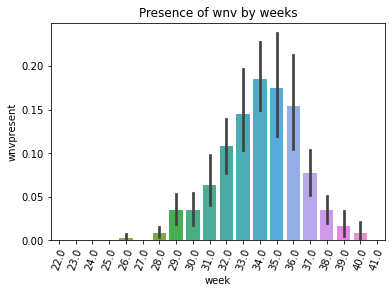

In [84]:
# effects of weeks
sns.barplot(data=train_merge, x='week', y='wnvpresent');
plt.xticks(rotation=70);
plt.title('Presence of wnv by weeks');

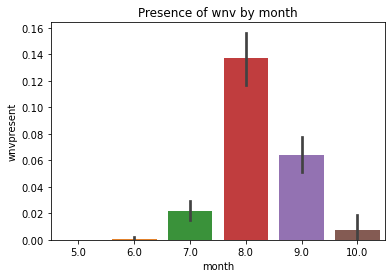

In [85]:
# effects of months
sns.barplot(data=train_merge, x='month', y='wnvpresent');
plt.title('Presence of wnv by month');

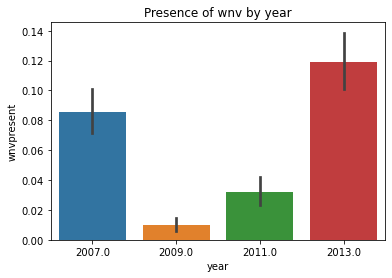

In [86]:
# effects of year
sns.barplot(data=train_merge, x='year', y='wnvpresent');
plt.title('Presence of wnv by year');

From the above plots, August is the highest month with the highest presence of west nile virus being detected. August corresponds with week 31-35. 
<br>
<br> Weeks would be kept (instead of months) since it looked more like a normal distribution. But year is interesting as well. 
<br>
<br> Year 2007 and 2013 are years with the highest presence of west nile virus detected. This needs to be explored further. In 2007, this could be due to a large amount of rain and hot weather, which produced favourable conditions for eggs ([source](https://www.cmaj.ca/content/177/12/1489.1))

In [87]:
train_merge.drop(columns=['month'],inplace=True)

### Spray with merged dataset

Spray dataset is from 2011 to 2013, and weather dataset has data in year 2011 and 2013. So there is limited information at how effective spraying was on the presence of wnv. 
<br>


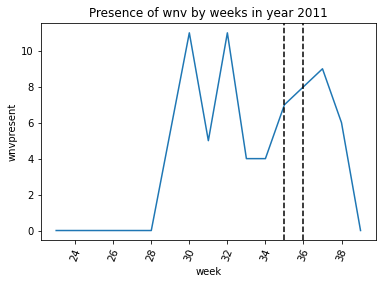

In [88]:
plotting2011 = train_merge[train_merge['year']==2011].groupby(['week'])['wnvpresent'].sum().reset_index()
sns.lineplot(x=plotting2011['week'], y=plotting2011['wnvpresent'])
for week in spray[spray['year'] == 2011].groupby('week').mean().index:
    plt.axvline(x=week, color='k', linestyle='--')
plt.xticks(rotation=70);
plt.title('Presence of wnv by weeks in year 2011');

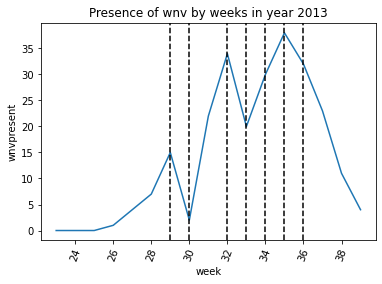

In [89]:
plotting2013 = train_merge[train_merge['year']==2013].groupby(['week'])['wnvpresent'].sum().reset_index()
sns.lineplot(x=plotting2013['week'], y=plotting2013['wnvpresent'])
for week in spray[spray['year'] == 2013].groupby('week').mean().index:
    plt.axvline(x=week, color='k', linestyle='--')
plt.xticks(rotation=70);
plt.title('Presence of wnv by weeks in year 2013');

Plots above showed the presence of wnv by weeks with periods of spraying (dotted vertical lines) for year 2011 and 2013. In the year 2011, the period of spraying in weeks 35 and 36 has little/no effect on wnv. For year 2013, spraying took place at some peaks and troughs of wnv. Since the culex mosquito life cycle is about 7-10 days from hatching to adulthood ([source](https://www.cdc.gov/westnile/resources/pdfs/FS_MosquitoLifeCycle-508.pdf)), there is perhaps a delay from the effects of spraying.
<br>
<br> So does spraying affect the number of mosquitoes?


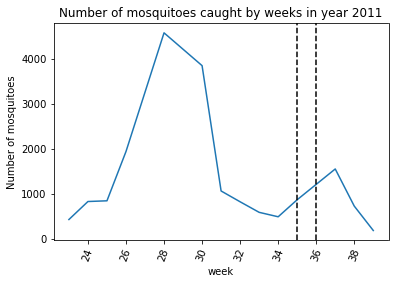

In [90]:
plottingnum2011 = train_merge[train_merge['year']==2011].groupby(['week'])['nummosquitos'].sum().reset_index()
sns.lineplot(x=plottingnum2011['week'], y=plottingnum2011['nummosquitos'])
for week in spray[spray['year'] == 2011].groupby('week').mean().index:
    plt.axvline(x=week, color='k', linestyle='--')
plt.xticks(rotation=70);
plt.ylabel('Number of mosquitoes')
plt.title('Number of mosquitoes caught by weeks in year 2011');

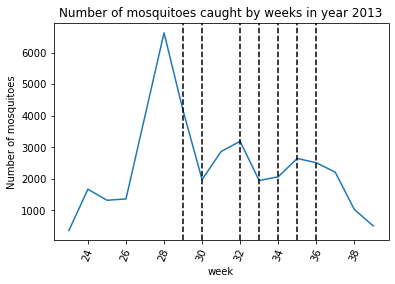

In [91]:
plottingnum2013 = train_merge[train_merge['year']==2013].groupby(['week'])['nummosquitos'].sum().reset_index()
sns.lineplot(x=plottingnum2013['week'], y=plottingnum2013['nummosquitos'])
for week in spray[spray['year'] == 2013].groupby('week').mean().index:
    plt.axvline(x=week, color='k', linestyle='--')
plt.xticks(rotation=70);
plt.ylabel('Number of mosquitoes')
plt.title('Number of mosquitoes caught by weeks in year 2013');

The above plots showed that the number of mosquitoes decreased one week (or approximately 7-10days) after spraying. So it is likely that spraying does have an effect of the number of mosquitoes caught. 

## Correlation

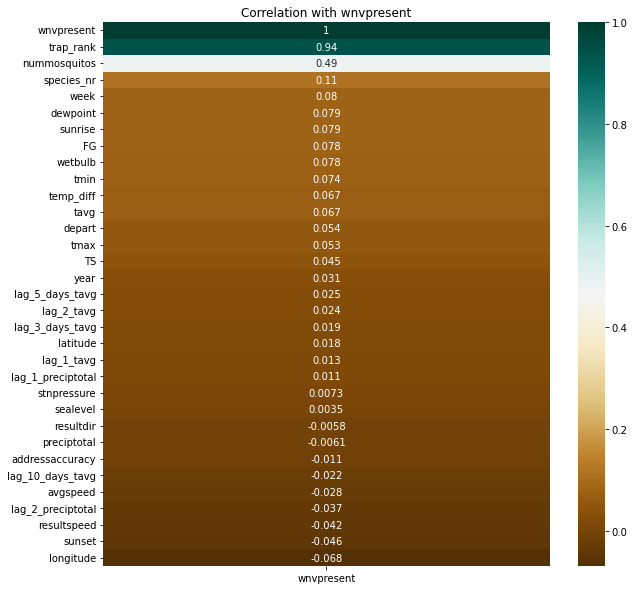

In [92]:
# plotting correlation with wnvpresent
corr = train_merge.corr()[['wnvpresent']].sort_values(by='wnvpresent', ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='BrBG')
plt.title('Correlation with wnvpresent');


In [93]:
traincorr = train_merge.corr().abs()
traincorr.loc[traincorr['wnvpresent']>=0.04,['wnvpresent']].sort_values(by=['wnvpresent'],ascending=False)

,wnvpresent
wnvpresent,1.000000
trap_rank,0.939675
nummosquitos,0.485048
species_nr,0.113105
week,0.079692
dewpoint,0.079406
sunrise,0.079328
FG,0.077827
wetbulb,0.077568
tmin,0.074250


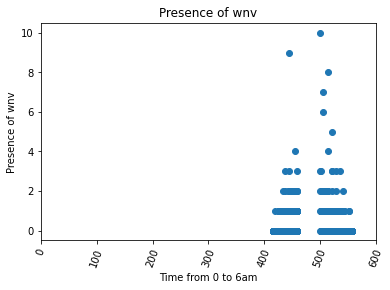

In [94]:
# effects of sunset
plt.scatter(train_merge['sunrise'],train_merge['wnvpresent']);
plt.xticks(rotation=70);
plt.xlim([0,600])
plt.title('Presence of wnv');
plt.xlabel('Time from 0 to 6am');
plt.ylabel('Presence of wnv');

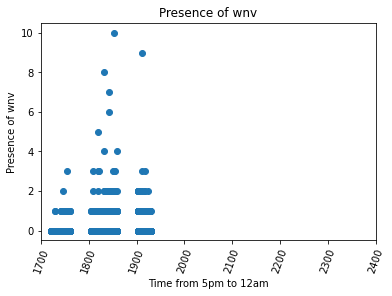

In [95]:
# effects of sunset
plt.scatter(train_merge['sunset'],train_merge['wnvpresent']);
plt.xticks(rotation=70);
plt.xlim([1700,2400])
plt.title('Presence of wnv');
plt.xlabel('Time from 5pm to 12am');
plt.ylabel('Presence of wnv');

In [96]:
# merge test set
test_merge = pd.merge(test, weather, on='date', how='inner')


In [97]:
test_merge.head(20)

,id,date,latitude,longitude,addressaccuracy,species_nr,trap_rank,tmax,tmin,tavg,depart,dewpoint,wetbulb,sunrise,sunset,...,resultdir,avgspeed,temp_diff,week,month,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,lag_3_days_tavg,lag_5_days_tavg,lag_10_days_tavg
0,1,2008-06-11,41.954690,-87.800991,9,2.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
1,2,2008-06-11,41.954690,-87.800991,9,1.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
2,3,2008-06-11,41.954690,-87.800991,9,3.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
3,4,2008-06-11,41.954690,-87.800991,9,0.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
4,5,2008-06-11,41.954690,-87.800991,9,0.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
5,6,2008-06-11,41.954690,-87.800991,9,0.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
6,7,2008-06-11,41.954690,-87.800991,9,0.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
7,8,2008-06-11,41.954690,-87.800991,9,0.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
8,9,2008-06-11,41.994991,-87.769279,9,2.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0
9,10,2008-06-11,41.994991,-87.769279,9,1.0,0,86.0,63.5,74.75,7.0,55.5,64.0,416.0,1926.0,...,18.0,10.2,9.75,24.0,6.0,2008.0,0.0,0.0,66.5,72.75,0.0,0.095,72.0,66.25,72.0


In [98]:
# drop columns
test_merge.drop(columns=['month'],inplace=True)

## Save cleaned dataframes as csv files.

In [99]:
train_merge.to_csv('../data/train_set.csv',index=False)


In [100]:
test_merge.to_csv('../data/test_set.csv',index=False)


In [101]:
# BREAKKK

# EDA

In [102]:
train_merge

,date,species_nr,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,trap_rank,tmax,tmin,tavg,depart,dewpoint,wetbulb,sunrise,...,resultspeed,resultdir,avgspeed,temp_diff,week,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,lag_3_days_tavg,lag_5_days_tavg,lag_10_days_tavg
0,2007-05-29,1.0,41.688324,-87.676709,8,1,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
1,2007-05-29,1.0,41.720848,-87.666014,9,3,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
2,2007-05-29,1.0,41.731922,-87.677512,8,5,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
3,2007-05-29,1.0,41.732984,-87.649642,8,1,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
4,2007-05-29,1.0,41.862292,-87.648860,8,1,0,0,88.0,62.5,75.25,10.0,58.5,65.5,421.0,...,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0,56.25,73.25,0.345,0.0,75.0,70.25,70.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,2013-09-26,3.0,41.960616,-87.777189,9,2,0,0,75.0,52.5,63.75,3.0,52.0,58.0,543.0,...,3.95,8.5,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0,64.0,70.50,58.25
8457,2013-09-26,3.0,41.964242,-87.757639,8,3,1,1,75.0,52.5,63.75,3.0,52.0,58.0,543.0,...,3.95,8.5,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0,64.0,70.50,58.25
8458,2013-09-26,3.0,41.973845,-87.805059,9,1,0,0,75.0,52.5,63.75,3.0,52.0,58.0,543.0,...,3.95,8.5,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0,64.0,70.50,58.25
8459,2013-09-26,3.0,41.974689,-87.890615,9,37,0,0,75.0,52.5,63.75,3.0,52.0,58.0,543.0,...,3.95,8.5,4.40,-1.25,39.0,2013.0,0.0,0.0,70.00,61.50,0.460,0.0,64.0,70.50,58.25


## Heatmap

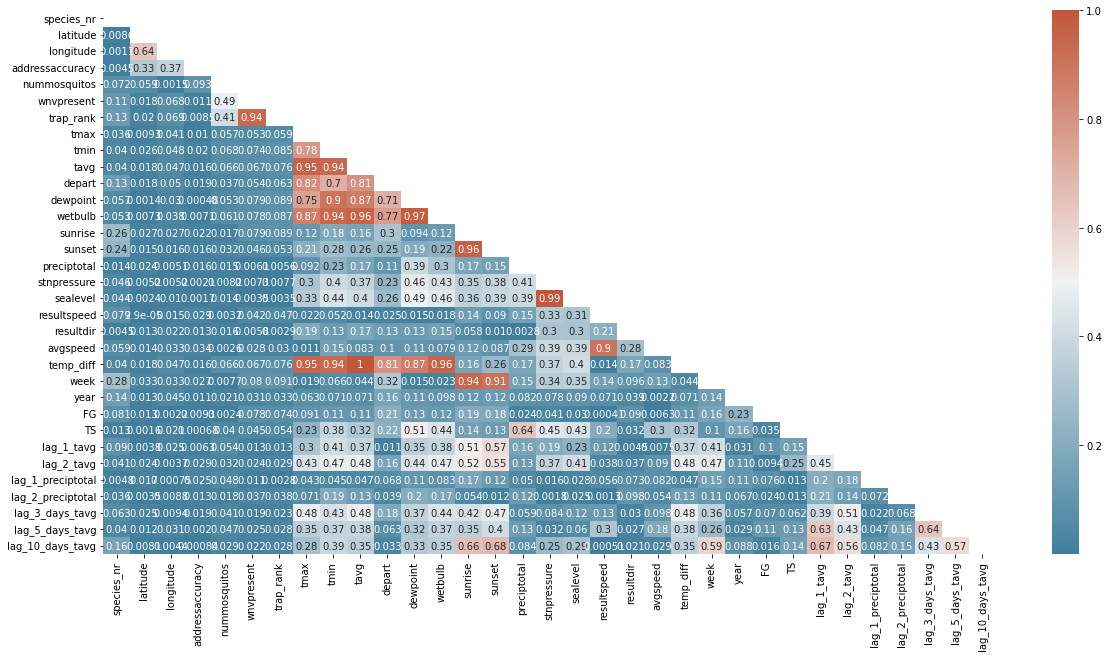

In [103]:
plt.figure(figsize=(20,10))

corr = np.abs(train_merge.corr())

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            cmap=cmap,
            mask=mask,
            annot=True,
            fmt='.2g'
           );

## Weekly plots

In [104]:
train_merge.groupby('week').mean().head(2)

,species_nr,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,trap_rank,tmax,tmin,tavg,depart,dewpoint,wetbulb,sunrise,sunset,...,sealevel,resultspeed,resultdir,avgspeed,temp_diff,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,lag_3_days_tavg,lag_5_days_tavg,lag_10_days_tavg
week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22.0,1.604938,41.841903,-87.684397,7.901235,2.839506,0.0,0.0,70.716049,56.969136,63.842593,-0.370370,53.314815,57.549383,421.000000,1916.308642,...,29.861481,6.491358,25.641975,7.814198,-1.157407,2008.382716,0.0,0.000000,56.250000,62.361111,0.106481,0.397531,64.456790,59.533951,65.833333
23.0,1.520588,41.853738,-87.707820,8.058824,6.423529,0.0,0.0,67.922059,49.239706,58.580882,-7.120588,46.700000,52.576471,417.417647,1922.755882,...,29.940147,7.173824,7.914706,8.220294,-6.419118,2009.705882,0.0,0.061765,65.805882,71.363235,0.002721,1.062794,66.124265,66.488971,69.724265


In [105]:
train_merge_plot = train_merge.groupby('week').mean()

In [106]:
train_merge_plot = train_merge_plot.reset_index()

In [107]:
train_merge.groupby('week')['nummosquitos'].mean()

week
22.0     2.839506
23.0     6.423529
24.0    13.088339
25.0    10.996575
26.0    16.157248
27.0    13.447059
28.0    17.115854
29.0    19.290323
30.0    20.074205
31.0    20.773183
32.0    19.001672
33.0    24.020202
34.0    15.284431
35.0    26.157593
36.0    19.518950
37.0    10.307692
38.0     8.600660
39.0     7.805687
40.0     6.522634
41.0    16.650000
Name: nummosquitos, dtype: float64

In [108]:
train_merge.groupby('week')['nummosquitos'].mean()

week
22.0     2.839506
23.0     6.423529
24.0    13.088339
25.0    10.996575
26.0    16.157248
27.0    13.447059
28.0    17.115854
29.0    19.290323
30.0    20.074205
31.0    20.773183
32.0    19.001672
33.0    24.020202
34.0    15.284431
35.0    26.157593
36.0    19.518950
37.0    10.307692
38.0     8.600660
39.0     7.805687
40.0     6.522634
41.0    16.650000
Name: nummosquitos, dtype: float64

In [109]:
train_merge_plot

,week,species_nr,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,trap_rank,tmax,tmin,tavg,depart,dewpoint,wetbulb,sunrise,...,sealevel,resultspeed,resultdir,avgspeed,temp_diff,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,lag_3_days_tavg,lag_5_days_tavg,lag_10_days_tavg
0,22.0,1.604938,41.841903,-87.684397,7.901235,2.839506,0.000000,0.000000,70.716049,56.969136,63.842593,-0.370370,53.314815,57.549383,421.000000,...,29.861481,6.491358,25.641975,7.814198,-1.157407,2008.382716,0.000000,0.000000,56.250000,62.361111,0.106481,0.397531,64.456790,59.533951,65.833333
1,23.0,1.520588,41.853738,-87.707820,8.058824,6.423529,0.000000,0.000000,67.922059,49.239706,58.580882,-7.120588,46.700000,52.576471,417.417647,...,29.940147,7.173824,7.914706,8.220294,-6.419118,2009.705882,0.000000,0.061765,65.805882,71.363235,0.002721,1.062794,66.124265,66.488971,69.724265
2,24.0,1.533569,41.855863,-87.704142,8.095406,13.088339,0.000000,0.000000,77.466431,56.213781,66.840106,-1.519435,53.261484,58.929329,416.000000,...,29.939470,5.553710,6.146643,6.866254,1.840106,2011.091873,0.000000,0.000000,72.094523,77.783569,0.902968,0.030848,71.989399,67.141343,76.519435
3,25.0,1.513699,41.844275,-87.694170,7.863014,10.996575,0.000000,0.000000,80.083904,64.489726,72.286815,1.561644,61.669521,65.094178,416.277397,...,29.854110,7.604281,20.787671,9.719863,7.286815,2010.965753,0.000000,0.477740,77.728596,72.936644,0.035625,0.000000,76.345034,76.222603,72.417808
4,26.0,1.488943,41.861691,-87.707347,8.083538,16.157248,0.002457,0.002457,86.125307,66.149877,76.137592,4.223587,62.522113,67.264128,418.437346,...,29.907592,7.485381,16.362408,8.526044,11.137592,2009.938575,0.000000,0.212531,72.473587,73.000614,0.050012,0.064607,70.181204,69.219902,78.323710
5,27.0,1.541176,41.876388,-87.712504,8.011765,13.447059,0.000000,0.000000,77.935294,56.600000,67.267647,-5.352941,50.517647,58.823529,419.870588,...,30.134765,7.445882,15.200000,8.960000,2.267647,2007.258824,0.000000,0.000000,81.117647,73.394118,0.235059,0.200235,77.785294,75.882353,70.250000
6,28.0,1.559756,41.851782,-87.697831,8.062195,17.115854,0.008537,0.008537,84.143293,65.635366,74.889329,1.819512,60.032317,65.967073,425.958537,...,29.949945,6.187683,20.367683,7.548049,9.889329,2010.424390,0.000000,0.135976,78.982622,75.138415,0.409055,0.141930,75.848476,79.455183,77.746037
7,29.0,1.746237,41.837675,-87.686284,7.784946,19.290323,0.034409,0.034409,82.932258,65.701075,74.316667,0.197849,61.202151,66.170968,431.683871,...,29.866086,10.354516,23.835484,11.305699,9.316667,2009.494624,0.000000,0.531183,71.823656,75.207527,0.146909,0.149925,71.122581,69.820430,71.935484
8,30.0,1.697880,41.860410,-87.706549,8.010601,20.074205,0.035336,0.035336,84.756184,67.264134,76.010159,1.954064,62.778269,67.564488,438.959364,...,29.926219,3.967403,21.416078,6.523763,11.010159,2010.508834,0.000000,0.244700,76.780919,73.578180,0.001016,0.162624,75.171378,75.451855,74.304770
9,31.0,1.904762,41.825230,-87.684829,7.814536,20.773183,0.063910,0.057644,86.283835,66.197368,76.240602,2.984962,61.070802,67.102130,445.263158,...,29.950664,5.094674,18.178571,5.990852,11.240602,2009.220551,0.000000,0.000000,75.513471,73.657581,0.095627,0.177331,73.066729,75.850251,74.992481


In [110]:
train_merge_plot.describe()

,week,species_nr,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,trap_rank,tmax,tmin,tavg,depart,dewpoint,wetbulb,sunrise,...,sealevel,resultspeed,resultdir,avgspeed,temp_diff,year,FG,TS,lag_1_tavg,lag_2_tavg,lag_1_preciptotal,lag_2_preciptotal,lag_3_days_tavg,lag_5_days_tavg,lag_10_days_tavg
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,31.50000,1.870720,41.840555,-87.689908,7.860915,14.703767,0.052473,0.049654,79.925120,60.985511,70.455315,2.202094,57.307400,62.675033,471.387284,...,29.963958,6.502943,18.019065,7.939451,5.455315,2009.441300,0.012211,0.145152,69.343765,69.108338,0.161381,0.194985,69.191566,69.468778,68.444205
std,5.91608,0.291229,0.031247,0.029720,0.405524,6.311055,0.065152,0.060832,5.222810,6.348207,5.551531,4.033669,6.233212,5.241481,53.487777,...,0.074760,2.067032,5.259993,1.870275,5.551531,1.167282,0.039309,0.172144,8.132214,7.316694,0.211406,0.233255,7.422591,6.507197,7.454508
min,22.00000,1.488943,41.716788,-87.712504,6.200000,2.839506,0.000000,0.000000,67.922059,49.239706,58.580882,-7.120588,44.000000,52.576471,416.000000,...,29.854110,3.632784,6.146643,5.552778,-6.419118,2007.000000,0.000000,0.000000,50.675926,50.000000,0.000835,0.000000,49.750000,58.000000,52.490741
25%,26.75000,1.555111,41.840502,-87.703293,7.852071,9.880934,0.000000,0.000000,77.206457,56.503445,66.225454,0.055795,53.301482,58.682462,420.717647,...,29.922234,5.195654,15.871578,6.492242,1.225454,2009.151940,0.000000,0.000000,63.768281,62.812741,0.028455,0.056167,65.707396,63.869184,63.035514
50%,31.50000,1.957331,41.843975,-87.694855,7.936069,15.720840,0.025498,0.025498,80.520067,63.757983,72.610158,1.886788,59.349249,65.071870,448.772883,...,29.945046,6.298068,17.964590,7.574891,7.610158,2009.463055,0.000000,0.074199,71.959089,72.956407,0.101054,0.156274,71.288142,69.520166,70.850165
75%,36.25000,2.099628,41.852271,-87.688092,8.058493,19.347480,0.084866,0.083194,84.296515,66.161750,75.021312,5.426568,61.882669,67.142630,522.878107,...,30.007858,7.455757,20.944773,8.777981,10.021312,2010.430039,0.000000,0.220573,75.712573,73.704357,0.219342,0.210064,75.059462,75.740340,72.889549
max,41.00000,2.350000,41.876388,-87.568832,8.095406,26.157593,0.185629,0.178144,86.283835,67.803512,76.368911,8.000000,66.619760,69.204341,557.000000,...,30.134765,11.800000,28.000000,13.050000,11.368911,2011.091873,0.157593,0.531183,81.117647,77.783569,0.902968,1.062794,77.785294,79.455183,78.323710


In [111]:
train_merge_plot['week'] = pd.to_numeric(train_merge_plot['week'], downcast='integer')

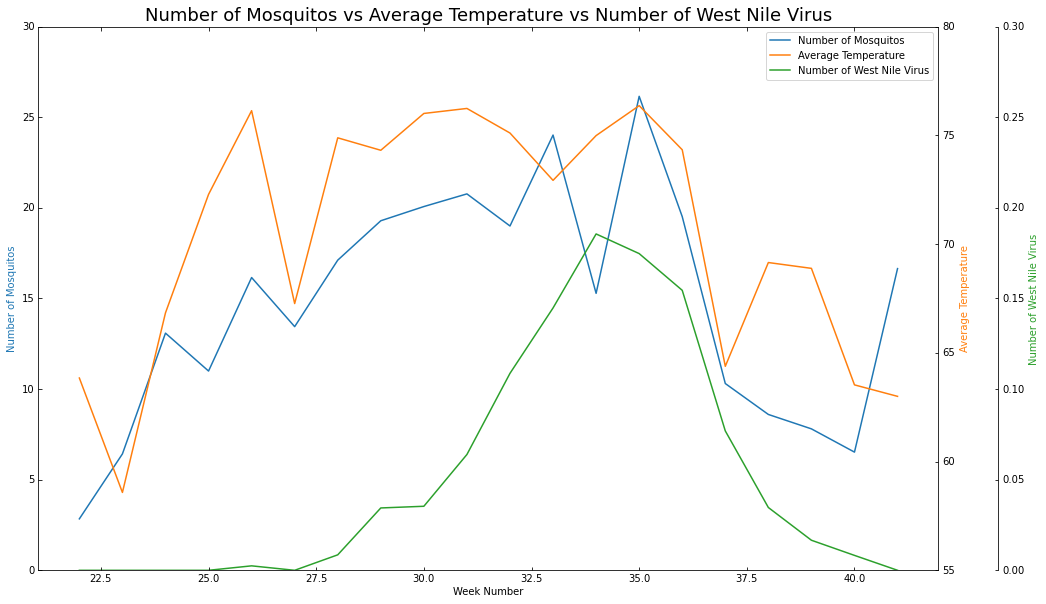

In [112]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

p1, = host.plot(train_merge_plot['week'], 
                train_merge_plot['nummosquitos'], 
                label="Number of Mosquitos")

p2, = par1.plot(train_merge_plot['week'], 
                train_merge_plot['tavg'], 
                label="Average Temperature")

p3, = par2.plot(train_merge_plot['week'],
                train_merge_plot['wnvpresent'], 
                label="Number of West Nile Virus")

host.set_ylim(0, 30)
par1.set_ylim(55, 80)
par2.set_ylim(0, 0.3)

host.set_xlabel("Week Number")
host.set_ylabel("Number of Mosquitos")
par1.set_ylabel("Average Temperature")
par2.set_ylabel("Number of West Nile Virus")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.title('Number of Mosquitos vs Average Temperature vs Number of West Nile Virus',
          fontdict={'fontsize': 18}
         )

plt.show()

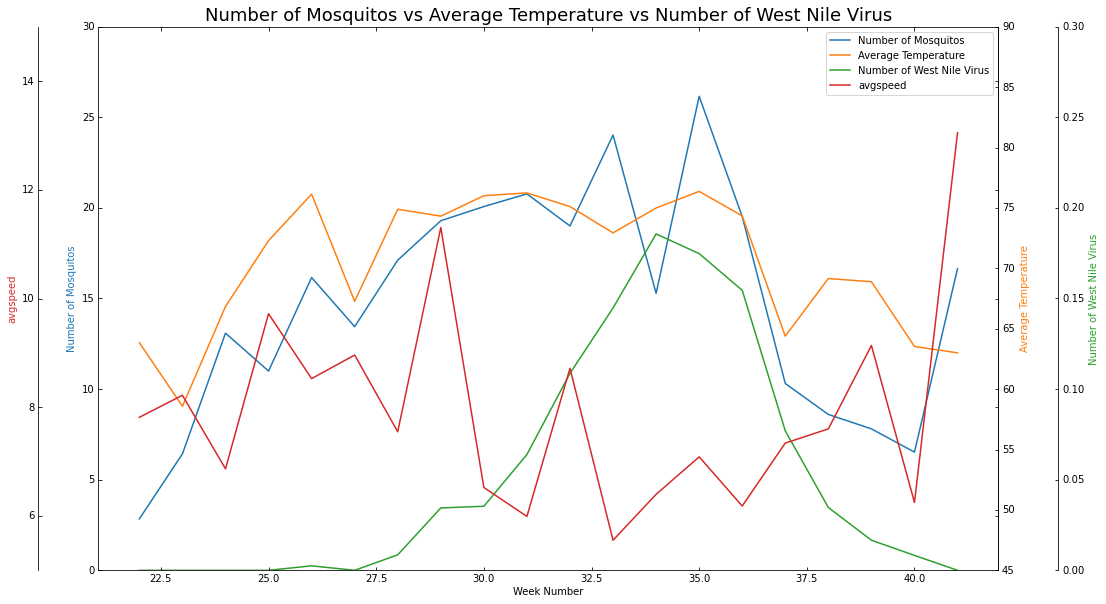

In [113]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))
par3.axis["left"] = par3.new_fixed_axis(loc="left", offset=(-60, 0))             # label location on the left


par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)
par3.axis['left'].toggle(all=True)                                # Setting the axis to the left

p1, = host.plot(train_merge_plot['week'], 
                train_merge_plot['nummosquitos'], 
                label="Number of Mosquitos")

p2, = par1.plot(train_merge_plot['week'], 
                train_merge_plot['tavg'], 
                label="Average Temperature")

p3, = par2.plot(train_merge_plot['week'],
                train_merge_plot['wnvpresent'], 
                label="Number of West Nile Virus")

p4, = par3.plot(train_merge_plot['week'],
                train_merge_plot['avgspeed'],               # Just change this one to the column of choice
                label='avgspeed'
               )

host.set_ylim(0, 30)
par1.set_ylim(45, 90)
par2.set_ylim(0, 0.3)
par3.set_ylim(5, 15)                                           # And adjust this based on the data min-max

host.set_xlabel("Week Number")
host.set_ylabel("Number of Mosquitos")
par1.set_ylabel("Average Temperature")
par2.set_ylabel("Number of West Nile Virus")
par3.set_ylabel('avgspeed')                                    # Label of 4th line

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())
par3.axis["left"].label.set_color(p4.get_color())


plt.title('Number of Mosquitos vs Average Temperature vs Number of West Nile Virus',
          fontdict={'fontsize': 18}
         )

plt.show()

# Modeling

## Imports and train_test_split

In [116]:
from sklearn.linear_model import (RidgeCV, 
                                  LassoCV, 
                                  ElasticNetCV, 
                                  LogisticRegressionCV)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline



In [117]:
X = train_merge.drop(columns=['tmin', 'tmax', 'date', 'nummosquitos', 
                              'trap_rank', 'wnvpresent', 
#                               'lag_3_days_tavg', 'lag_5_days_tavg', 'lag_10_days_tavg',
                             ])

y = train_merge['wnvpresent'].map(lambda x:0 if x == 0 else 1)

In [119]:
X.shape

(8461, 28)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y
                                                   )

## Create function for fitting and concatenating results

In [120]:
result = pd.DataFrame()
result_columns = ['Model', 'Accuracy', 'Misclassification', 'Sensitivity', 'Specificity', 'Precision']


In [121]:
def gs_model(gs_name, model_name):
    global result
    gs_name.fit(X_train, y_train)
    tn, fp, fn, tp = confusion_matrix(y_test, gs_name.predict(X_test)).ravel()
    accuracy = round((tp+tn)/(tn+fp+fn+tp),3)*100 
    misclassification = round(1-(tp+tn)/(tn+fp+fn+tp),3)*100
    sensitivity = round((tp)/(tp+fn),3)*100
    specificity = round(tn/(tn+fp),3)*100
    precision = round(tp/(tp+fp),3)*100
    
    result_new = pd.DataFrame([model_name, 
                                accuracy,
                                misclassification,
                                sensitivity,
                                specificity,
                                precision
                               ], index=result_columns).T
    
    result = pd.concat(objs=(result, result_new), axis=0)
    
    plot_confusion_matrix(gs_name, 
                          X_test, y_test, 
                          cmap='Blues', 
                          values_format='d',
                          display_labels=['No WNV', 'WNV']
                         );
    print(f'Model Best Params: {gs_name.best_params_}')
    return result

## SS, Smote, Logistic (Ridge)

In [122]:
smote = SMOTE()
ss = StandardScaler()
logit = LogisticRegressionCV()

pipe_ss_smote_logit_ridge = Pipeline([
    ('ss', ss),
    ('smote', smote),
    ('logit', logit),
])

pipe_ss_smote_logit_ridge_params = {
    'smote__k_neighbors': [5], # 3, 10, 15
    'smote__random_state': [42],
    'smote__n_jobs': [-1],
    'smote__sampling_strategy': ['minority'],
    'logit__cv': [15], #5, 10, 20, 25
    'logit__n_jobs': [-1],
    'logit__random_state': [42],
    'logit__scoring': ['roc_auc'],
    'logit__solver': ['saga'],
    'logit__max_iter': [10_000],
}

gs_ss_smote_logit_ridge = GridSearchCV(
    estimator=pipe_ss_smote_logit_ridge,
    param_grid=pipe_ss_smote_logit_ridge_params,
    cv=5
)

In [ ]:
pipe_ss_smote_logit_ridge_params.get_params()

In [ ]:
gs_model(gs_ss_smote_logit, 'SS, Smote, Logit-Ridge')

In [ ]:
pd.DataFrame(gs_ss_smote_logit.best_estimator_['logit'].coef_[0], 
             index=X_train.columns).T

In [ ]:
kaggle_X = test_merge[['species_nr', 'latitude', 'longitude', 'addressaccuracy', 'tavg', 
                       'depart', 'dewpoint', 'wetbulb', 'sunrise', 'sunset', 'preciptotal', 
                       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 
                       'temp_diff', 'week', 'year', 'FG', 'TS', 'lag_1_tavg', 'lag_2_tavg', 
                       'lag_1_preciptotal', 'lag_2_preciptotal', 
                       'lag_3_days_tavg', 'lag_5_days_tavg', 'lag_10_days_tavg'
                      ]]

In [ ]:
len(gs_ss_smote_logit.best_estimator_.predict_proba(kaggle_X))

In [ ]:
duration = time.time()
kaggle_submit = []
kk = 0
for i in range(kaggle_X.shape[0]):
    kaggle_submit.extend([gs_ss_smote_logit.best_estimator_.predict_proba(kaggle_X)[i][1]])
    if i % 2000 == 0:
        kk += 1
        print(kk)
    
print(time.time() - duration)
kaggle_submit


In [ ]:
kaggle_submit = pd.DataFrame(kaggle_submit)
kaggle_submit.reset_index(inplace=True)
kaggle_submit.columns = ['Id', 'WnvPresent']
kaggle_submit['Id'] = kaggle_submit['Id'] + 1

In [ ]:
kaggle_submit

In [ ]:
kaggle_submit['WnvPresent'].describe()

In [ ]:
kaggle_submit.set_index('Id', inplace=True)

In [ ]:
kaggle_submit.to_csv(r'/Users/edwardnathanael/Documents/DSI-roughpaper/project_4/West-Nile-Project-main/combined/gs_ss_smote_logit_2.csv')

## SS, Smote, Logistic (Lasso)

In [ ]:
smote = SMOTE()
ss = StandardScaler()
logit = LogisticRegressionCV()

pipe_ss_smote_logit_lasso = Pipeline([
    ('ss', ss),
    ('smote', smote),
    ('logit', logit),
])

pipe_ss_smote_logit_lasso_params = {
    'smote__k_neighbors': [3], # 5, 10, 15
    'smote__random_state': [42],
    'smote__n_jobs': [-1],
    'smote__sampling_strategy': ['minority'],
    'logit__cv': [20], # 5, 10, 15, 25
    'logit__n_jobs': [-1],
    'logit__random_state': [42],
    'logit__scoring': ['roc_auc'],
    'logit__solver': ['saga'],
    'logit__max_iter': [10_000],
    'logit__penalty': ['l1'],
#     'logit__l1_ratios': [num for num in np.logspace(-3, 3, 20)]
}

gs_ss_smote_logit_lasso = GridSearchCV(
    estimator=pipe_ss_smote_logit_lasso,
    param_grid=pipe_ss_smote_logit_lasso_params,
    cv=5
)

In [ ]:
gs_model(gs_ss_smote_logit_lasso, 'SS, Smote, Logit-Lasso')

In [ ]:
kaggle_X = test_merge[['species_nr', 'latitude', 'longitude', 'addressaccuracy', 'tavg', 
                       'depart', 'dewpoint', 'wetbulb', 'sunrise', 'sunset', 'preciptotal', 
                       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 
                       'temp_diff', 'week', 'year', 'FG', 'TS', 'lag_1_tavg', 'lag_2_tavg', 
                       'lag_1_preciptotal', 'lag_2_preciptotal', 
                       'lag_3_days_tavg', 'lag_5_days_tavg', 'lag_10_days_tavg'
                      ]]

In [ ]:
kaggle_submit = pd.DataFrame(kaggle_submit)
kaggle_submit.reset_index(inplace=True)
kaggle_submit.columns = ['Id', 'WnvPresent']
kaggle_submit['Id'] = kaggle_submit['Id'] + 1

In [ ]:
kaggle_submit.set_index('Id', inplace=True)

In [ ]:
kaggle_submit.to_csv(r'/Users/edwardnathanael/Documents/DSI-roughpaper/project_4/West-Nile-Project-main/combined/gs_ss_smote_logit_lasso.csv')